In [14]:
from dtw import dtw
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split, GroupShuffleSplit

In [11]:
NUMBER_OF_MFCCS = 13
CLIP_SIZE = 1290

In [6]:
from audio_classification.dtwclassifier.dtw import dtw
from audio_classification.dtwclassifier.distances import euclid
from audio_classification.dtwclassifier.ranges import default_range, itakura_range

In [7]:
n = 20
m = 20

res = itakura_range(n, m, 2)
array = np.array([[None]*n]*m)
for (i, j) in res:
    array[i, j] = 1
pd.DataFrame(array)

0     1     2     3     4     5     6     7     8     9     10    11  \
0      1  None  None  None  None  None  None  None  None  None  None  None   
1      1     1     1  None  None  None  None  None  None  None  None  None   
2   None     1     1     1     1  None  None  None  None  None  None  None   
3   None     1     1     1     1     1     1  None  None  None  None  None   
4   None  None     1     1     1     1     1     1     1  None  None  None   
5   None  None     1     1     1     1     1     1     1     1     1  None   
6   None  None  None     1     1     1     1     1     1     1     1     1   
7   None  None  None     1     1     1     1     1     1     1     1     1   
8   None  None  None  None     1     1     1     1     1     1     1     1   
9   None  None  None  None     1     1     1     1     1     1     1     1   
10  None  None  None  None  None     1     1     1     1     1     1     1   
11  None  None  None  None  None     1     1     1     1     1     1     1   
12  None  None  None  None  None  None     1     1     1     1     1     1   
13  None  None  None  None  None  None  None     1     1     1     1     1   
14  None  None  None  None  None  None  None  None  None     1     1     1   
15  None  None  None  None  None  None  None  None  None  None  None     1   
16  None  None  None  None  None  None  None  None  None  None  None  None   
17  None  None  None  None  None  None  None  None  None  None  None  None   
18  None  None  None  None  None  None  None  None  None  None  None  None   
19  None  None  None  None  None  None  None  None  None  None  None  None   

      12    13    14    15    16    17    18    19  
0   None  None  None  None  None  None  None  None  
1   None  None  None  None  None  None  None  None  
2   None  None  None  None  None  None  None  None  
3   None  None  None  None  None  None  None  None  
4   None  None  None  None  None  None  None  None  
5   None  None  None  None  None  None  None  None  
6      1  None  None  None  None  None  None  None  
7      1     1  None  None  None  None  None  None  
8      1     1     1  None  None  None  None  None  
9      1     1     1  None  None  None  None  None  
10     1     1     1     1  None  None  None  None  
11     1     1     1     1  None  None  None  None  
12     1     1     1     1     1  None  None  None  
13     1     1     1     1     1  None  None  None  
14     1     1     1     1     1     1  None  None  
15     1     1     1     1     1     1  None  None  
16  None     1     1     1     1     1     1  None  
17  None  None  None     1     1     1     1  None  
18  None  None  None  None  None     1     1     1  
19  None  None  None  None  None  None  None     1

In [8]:
from audio_classification.preprocess import preprocess
data, similarity = preprocess(NUMBER_OF_MFCCS)

Cached features found


In [29]:
df = pd.read_csv('preprocessed_nmfcc_13/data.csv')

X = df[['file']]
y = df[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=666)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=666)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from audio_classification.dtwclassifier.dtwclassifier import DTWClassifier
from audio_classification.dtwclassifier.distances import euclid, minkowski
from audio_classification.dtwclassifier.ranges import sakoe_chiba_range, itakura_range, default_range

def manhattan(v1, v2):
    return minkowski(v1, v2, 1)

params = ParameterGrid({
    'mode': [DTWClassifier.MODE_MEAN, DTWClassifier.MODE_MIN],
    'n_compared_songs': range(5, 40 + 1, 5),
    'dist_fn': [manhattan, euclid],
    'range_fn': [sakoe_chiba_range, itakura_range, default_range]
})

res = []
for param in params:
    print(param)
    cls = DTWClassifier(param['mode'], param['n_compared_songs'], param['dist_fn'], param['range_fn'])
    cls.fit(X_train, y_train)
    resdf = cls.classify_multiple(X_valid)
    res.append({
        'accurancy': accuracy_score(y_valid, resdf),
        'n_compared_songs': param['n_compared_songs'],
        'params': {'mode': param['mode'], 'range_fn': str(param['range_fn'].__name__), 'dist_fn': str(param['dist_fn'].__name__)}
    })

{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 5, 'range_fn': <function sakoe_chiba_range at 0x7fb15a283ef0>}
{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 5, 'range_fn': <function itakura_range at 0x7fb15a28f050>}
{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 5, 'range_fn': <function default_range at 0x7fb15a283b00>}
{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 10, 'range_fn': <function sakoe_chiba_range at 0x7fb15a283ef0>}
{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 10, 'range_fn': <function itakura_range at 0x7fb15a28f050>}
{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 10, 'range_fn': <function default_range at 0x7fb15a283b00>}
{'dist_fn': <function manhattan at 0x7fb1335f6200>, 'mode': 'MEAN', 'n_compared_songs': 15, 'range_fn': <fu

{'dist_fn': <function euclid at 0x7fb15a283b90>, 'mode': 'MEAN', 'n_compared_songs': 15, 'range_fn': <function default_range at 0x7fb15a283b00>}
{'dist_fn': <function euclid at 0x7fb15a283b90>, 'mode': 'MEAN', 'n_compared_songs': 20, 'range_fn': <function sakoe_chiba_range at 0x7fb15a283ef0>}
{'dist_fn': <function euclid at 0x7fb15a283b90>, 'mode': 'MEAN', 'n_compared_songs': 20, 'range_fn': <function itakura_range at 0x7fb15a28f050>}
{'dist_fn': <function euclid at 0x7fb15a283b90>, 'mode': 'MEAN', 'n_compared_songs': 20, 'range_fn': <function default_range at 0x7fb15a283b00>}


In [22]:
df = pd.DataFrame(res)
df['params'] = str(df['params'])
pd

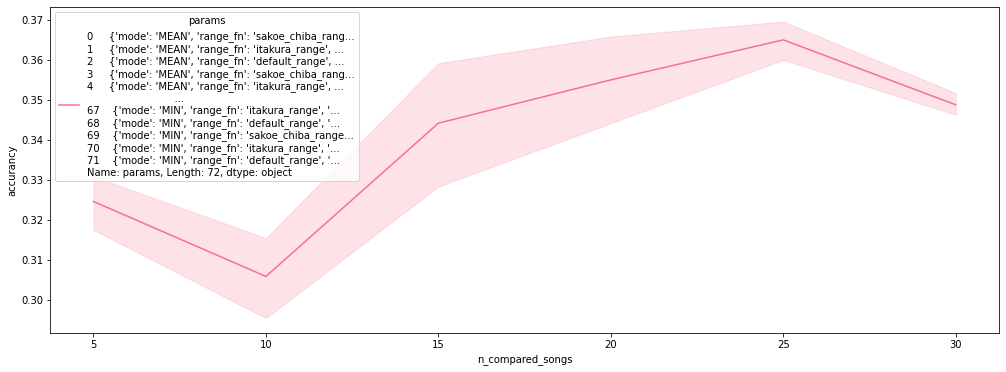

In [24]:
import seaborn as sns
dtw_accurancy = df
fig, axs = plt.subplots(figsize=(17,6))
ax = sns.lineplot(data=dtw_accurancy, x='n_compared_songs', y="accurancy", hue="params", palette="husl")

plt.savefig(f"graphs/dtw-accurancy.pdf", format="pdf", bbox_inches="tight")